In [6]:
%matplotlib inline

In [7]:
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

NameError: name 'reload' is not defined

In [8]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [9]:
# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

In [26]:
# Read in players data
players = pd.read_csv('datasetplayers.csv')
players.head()

,Id,Idade,Altura,Técnica,Passe,Chute,Força,Velocidade,Drible,Classe
0,1,17,177,72,65,72,60,84,81,Atacante
1,2,18,188,63,65,55,70,72,60,Defensor
2,3,18,190,63,65,67,70,72,66,Atacante
3,4,19,165,65,62,71,62,70,67,Atacante
4,5,19,174,67,66,69,64,76,74,Atacante


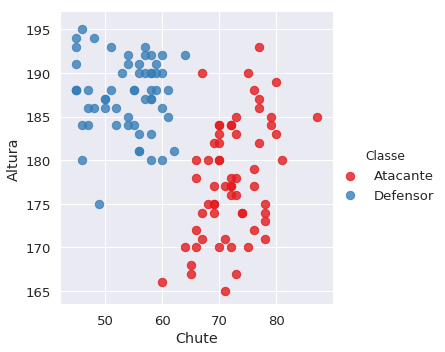

In [12]:
# Plot two ingredients
sns.lmplot('Chute', 'Altura', data=players, hue='Classe',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [ ]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
charac = players[['Chute','Altura']].as_matrix()
class_label = np.where(players['Classe']== 'Atacante', 0, 1)

# Feature names
players_features = players.columns.values[1:].tolist()
players_features

In [14]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(charac, class_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [16]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(40, 100)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

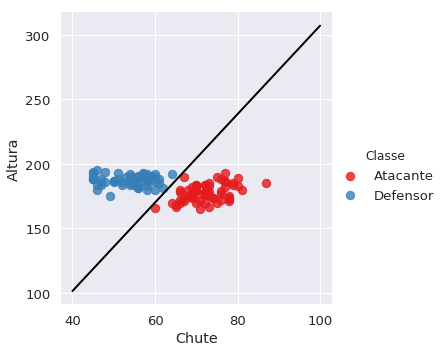

In [17]:
# Plot the hyperplane
sns.lmplot('Chute', 'Altura', data=players, hue='Classe', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

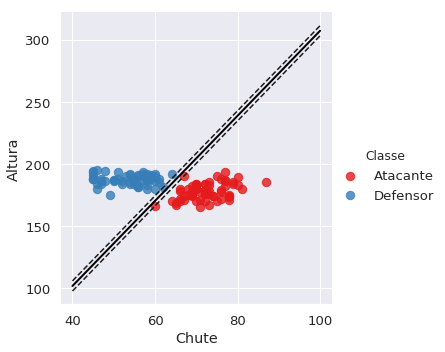

In [18]:
# Look at the margins and support vectors
sns.lmplot('Chute', 'Altura', data=players, hue='Classe', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [19]:
# Create a function to guess when a recipe is a muffin or a cupcake
def striker_or_defense(chute, altura):
    if(model.predict([[chute, altura]]))==0:
        print('You\'re looking at a striker player!')
    else:
        print('You\'re looking at a defense player!')

In [22]:
# Predict if 50 parts flour and 20 parts sugar
striker_or_defense(40, 100)

You're looking at a striker player!
